#HW6

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import random
%matplotlib inline

In [22]:
data = sio.loadmat('./mnist_data/images.mat')
Images = data['images']
Images = Images.T
X_train = np.zeros((Images.shape[0],Images.shape[1]*Images.shape[2]))
N = X_train.shape[0]
d = X_train.shape[1]
i =0
for row in Images:
    X_train[i] = row.reshape((d))
    i+=1

In [23]:
def assign_points(X, mu):
    clusters = {}
    distance = {}
    for x in X:
        i=0
        for mui in mu:
            distance[i] = np.sum((np.subtract(x, mui)) ** 2)
            i+=1
        bestmu = min(distance, key=distance.get)
        distance.clear()
        try:
            clusters[bestmu].append(x)
        except KeyError:
            clusters[bestmu] = [x]
    return clusters


def update_mean(clusters, mu):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis=0))
    return newmu


def check_converge(newmu, mu):
    for i in range(len(mu)):
        if not (newmu[i] == mu[i]).all():
            return False
    return True


def find_centers(X, k):
    # Initialize to K random centers
    mu = np.array(random.sample(X.tolist(), k))
    newmu = np.array(random.sample(X.tolist(), k))
    while not check_converge(newmu, mu):
        mu = newmu
        # Assign all points in X to clusters
        clusters = assign_points(X, mu)
        #print(len(clusters))
        # Reevaluate centers
        newmu = update_mean(clusters, mu)
    return (newmu, clusters)

$$ \Large k = 5 $$

In [24]:
if __name__ == "__main__":
    k = 5
    mu,clusters = find_centers(X_train, k)

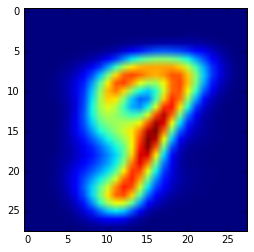

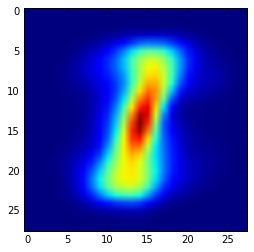

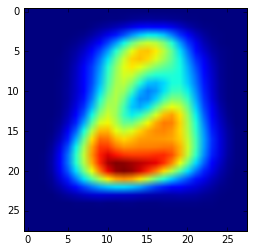

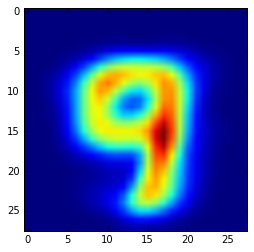

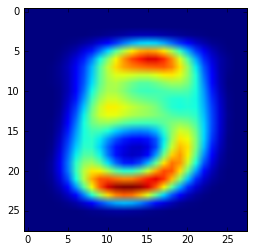

In [25]:
for i in range(len(mu)):
     plt.figure(i+1)
     plt.imshow(mu[i].reshape((28,28)).T)

$$ \Large K = 10 $$

In [26]:
k2 = 10
mu2,clusters2 = find_centers(X_train, k2)

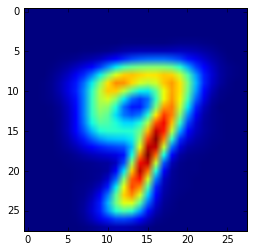

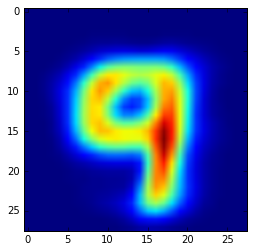

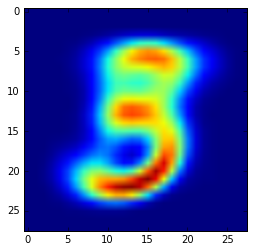

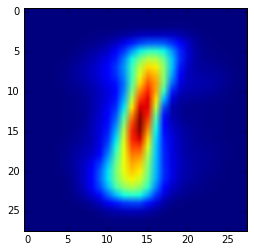

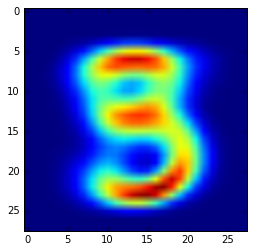

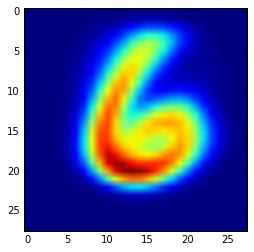

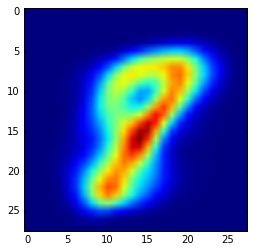

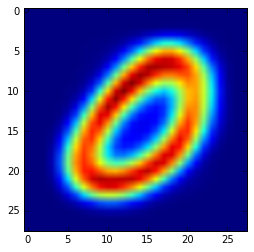

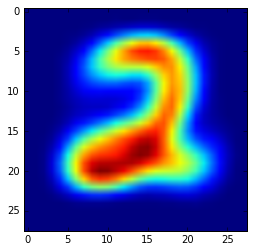

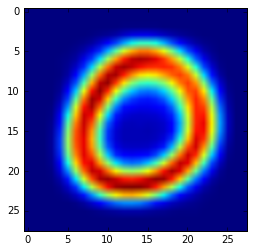

In [27]:
for i in range(len(mu2)):
     plt.figure(i+1)
     plt.imshow(mu2[i].reshape((28,28)).T)

$$ \Large K= 20 $$

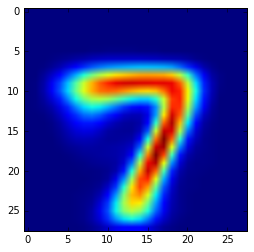

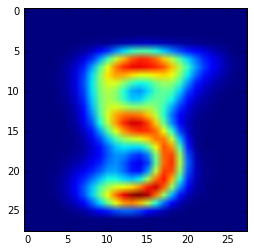

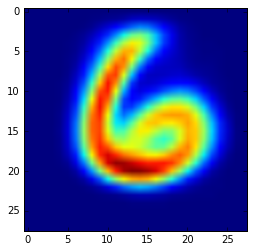

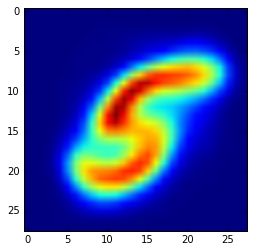

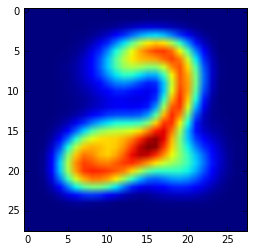

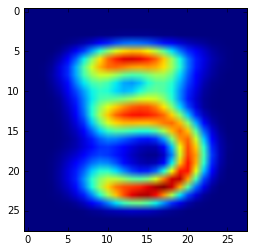

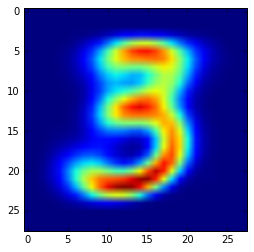

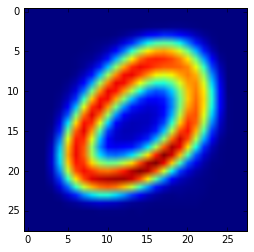

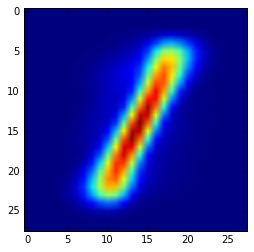

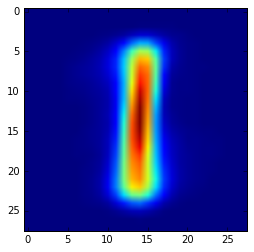

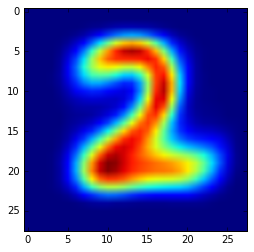

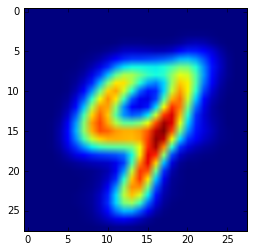

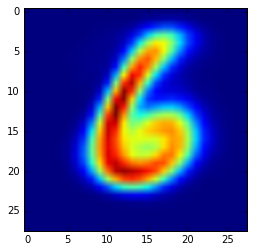

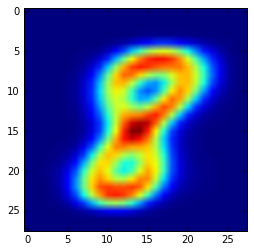

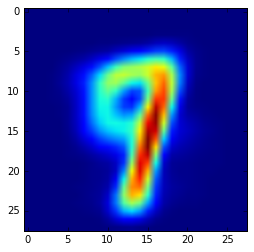

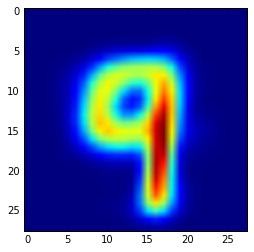

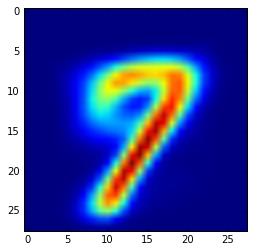

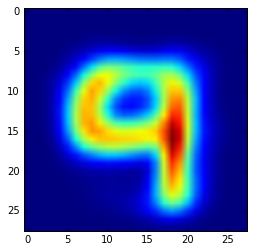

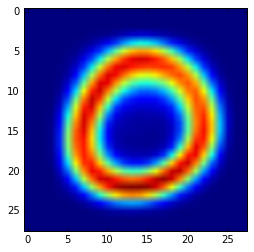

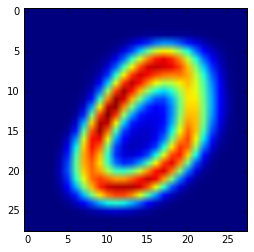

In [28]:
k3 = 20
mu3,clusters3 = find_centers(X_train, k3)
for i in range(len(mu3)):
     plt.figure(i+1)
     plt.imshow(mu3[i].reshape((28,28)).T)